In [51]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

In [182]:
df = pd.read_csv(r"C:\Users\Airin\Desktop\Xccelerate\Project 1 - Web Scraping Openrice\openrice_raw_dataframe.csv")

In [183]:
df.head()

,restaurant_name,price_range_per_head,good_ratings,bad_ratings,full_address,district,cuisine,dish,written_reviews,bookmarks
0,Tearapy 茶聊,$101-200,1149,45,"1/F, 189 Portland Street, Mong Kok",Mong Kok,International,Hamburger,1514,72200
1,The Captain's House,$201-400,1386,54,"18/F, H8, 8 Hau Fook Street, Tsim Sha Tsui",Tsim Sha Tsui,Western,Seafood,1625,65700
2,Outdark (厚福街),$101-200,900,22,"17/F, H8, 8 Hau Fook Street, Tsim Sha Tsui",Tsim Sha Tsui,Korean,Korean Fried Chicken,1059,61500
3,Yadllie Plate 야들리애플래이트,$101-200,1183,66,"11/F, CTMA Centre, 1 Sai Yeung Choi Street, Mo...",Mong Kok,Korean,Korean Fried Chicken,1571,117800
4,Outdark (飛達商業中心),$201-400,1175,28,"2/F, Fee Tat Commercial Centre, 613 Nathan Roa...",Mong Kok,Korean,NaN,1370,67800


## Data Preprocessing

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   restaurant_name       250 non-null    object
 1   price_range_per_head  250 non-null    object
 2   good_ratings          250 non-null    int64 
 3   bad_ratings           250 non-null    int64 
 4   full_address          250 non-null    object
 5   district              250 non-null    object
 6   cuisine               250 non-null    object
 7   dish                  228 non-null    object
 8   written_reviews       250 non-null    int64 
 9   bookmarks             250 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 19.7+ KB


In [185]:
df_nan = df

In [186]:
df_nan.isnull().sum()

restaurant_name          0
price_range_per_head     0
good_ratings             0
bad_ratings              0
full_address             0
district                 0
cuisine                  0
dish                    22
written_reviews          0
bookmarks                0
dtype: int64

In [187]:
df['sum_of_ratings'] = df['good_ratings'] + df['bad_ratings']
df['overall_rating_percentage_score'] = df['good_ratings']/df['sum_of_ratings']*100


In [188]:
df.loc[df['price_range_per_head'] == "$101-200", 'average_price_per_head'] = int(150)
df.loc[df['price_range_per_head'] == "$201-400", 'average_price_per_head'] = int(300)
df.loc[df['price_range_per_head'] == "$51-100", 'average_price_per_head'] = int(75)
df.loc[df['price_range_per_head'] == "$401-800", 'average_price_per_head'] = int(600)
df.loc[df['price_range_per_head'] == "Below $50", 'average_price_per_head'] = int(25)
df.loc[df['price_range_per_head'] == "Above 801", 'average_price_per_head'] = int(800)



In [189]:
df.loc[df['district'] == ("Mong Kok"), 'region'] = "Kowloon"
df.loc[df['district'] == ("Tsim Sha Tsui"), 'region'] = "Kowloon"
df.loc[df['district'] == ("Causeway Bay"), 'region'] = "Hong Kong Island"
df.loc[df['district'] == ("Kwun Tong"), 'region'] = "Kowloon"
df.loc[df['district'] == ("Tsuen Wan"), 'region'] = "New Territories"
df.loc[df['district'] == ("Wan Chai"), 'region'] = "Hong Kong Island"
df.loc[df['district'] == ("Central"), 'region'] = "Hong Kong Island"
df.loc[df['district'] == ("Tai Kok Tsui"), 'region'] = "Kowloon"
df.loc[df['district'] == ("Jordan"), 'region'] = "Kowloon"
df.loc[df['district'] == ("Prince Edward"), 'region'] = "Kowloon"
df.loc[df['district'] == ("Yuen Long"), 'region'] = "New Territories"
df.loc[df['district'] == ("Tseung Kwan O"), 'region'] = "New Territories"
df.loc[df['district'] == ("Sha Tin"), 'region'] = "New Territories"
df.loc[df['district'] == ("Yau Ma Tei"), 'region'] = "Kowloon"
df.loc[df['district'] == ("Tai Po"), 'region'] = "Kowloon"
df.loc[df['district'] == ("Cheung Sha Wan"), 'region'] = "Kowloon"
df.loc[df['district'] == ("Tai Wai"), 'region'] = "New Territories"
df.loc[df['district'] == ("Kowloon Bay"), 'region'] = "Kowloon"
df.loc[df['district'] == ("Western District"), 'region'] = "Hong Kong Island"
df.loc[df['district'] == ("Sham Shui Po"), 'region'] = "Kowloon"
df.loc[df['district'] == ("Kowloon City"), 'region'] = "Kowloon"
df.loc[df['district'] == ("North Point"), 'region'] = "Hong Kong Island"
df.loc[df['district'] == ("Lai Chi Kok"), 'region'] = "Kowloon"
df.loc[df['district'] == ("San Po Kong"), 'region'] = "Kowloon"
df.loc[df['district'] == ("Wong Tai Sin"), 'region'] = "Kowloon"


In [181]:
df.head()

,restaurant_name,price_range_per_head,good_ratings,bad_ratings,full_address,district,cuisine,dish,written_reviews,bookmarks,sum_of_ratings,overall_rating_percentage_score,average_price_per_head,region
0,Tearapy 茶聊,$101-200,1149,45,"1/F, 189 Portland Street, Mong Kok",Mong Kok,International,Hamburger,1514,72200,1194,96.231156,150.0,Kowloon
1,The Captain's House,$201-400,1386,54,"18/F, H8, 8 Hau Fook Street, Tsim Sha Tsui",Tsim Sha Tsui,Western,Seafood,1625,65700,1440,96.250000,300.0,Kowloon
2,Outdark (厚福街),$101-200,900,22,"17/F, H8, 8 Hau Fook Street, Tsim Sha Tsui",Tsim Sha Tsui,Korean,Korean Fried Chicken,1059,61500,922,97.613883,150.0,Kowloon
3,Yadllie Plate 야들리애플래이트,$101-200,1183,66,"11/F, CTMA Centre, 1 Sai Yeung Choi Street, Mo...",Mong Kok,Korean,Korean Fried Chicken,1571,117800,1249,94.715773,150.0,Kowloon
4,Outdark (飛達商業中心),$201-400,1175,28,"2/F, Fee Tat Commercial Centre, 613 Nathan Roa...",Mong Kok,Korean,NaN,1370,67800,1203,97.672485,300.0,Kowloon


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   restaurant_name                  250 non-null    object 
 1   price_range_per_head             250 non-null    object 
 2   good_ratings                     250 non-null    int64  
 3   bad_ratings                      250 non-null    int64  
 4   full_address                     250 non-null    object 
 5   district                         250 non-null    object 
 6   cuisine                          250 non-null    object 
 7   dish                             228 non-null    object 
 8   written_reviews                  250 non-null    int64  
 9   bookmarks                        250 non-null    int64  
 10  sum_of_ratings                   250 non-null    int64  
 11  overall_rating_percentage_score  250 non-null    float64
 12  average_price_per_head

In [ ]:
# Clearing rows with null values

In [193]:
df = df.dropna()

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 249
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   restaurant_name                  226 non-null    object 
 1   price_range_per_head             226 non-null    object 
 2   good_ratings                     226 non-null    int64  
 3   bad_ratings                      226 non-null    int64  
 4   full_address                     226 non-null    object 
 5   district                         226 non-null    object 
 6   cuisine                          226 non-null    object 
 7   dish                             226 non-null    object 
 8   written_reviews                  226 non-null    int64  
 9   bookmarks                        226 non-null    int64  
 10  sum_of_ratings                   226 non-null    int64  
 11  overall_rating_percentage_score  226 non-null    float64
 12  average_price_per_head

# Exploratory Data Analysis

## Most Popular Districts

In [199]:
df.district.value_counts()

Tsim Sha Tsui       53
Mong Kok            42
Causeway Bay        30
Kwun Tong           19
Tsuen Wan           15
Wan Chai            11
Central              7
Jordan               6
Tseung Kwan O        4
Yuen Long            4
Prince Edward        4
Tai Kok Tsui         4
Cheung Sha Wan       3
Tai Po               3
Yau Ma Tei           3
Western District     2
Tai Wai              2
Kowloon Bay          2
Sham Shui Po         2
Kowloon City         2
North Point          2
Sha Tin              2
Lai Chi Kok          2
San Po Kong          1
Wong Tai Sin         1
Name: district, dtype: int64

In [200]:
plt.style.use('seaborn-pastel') 

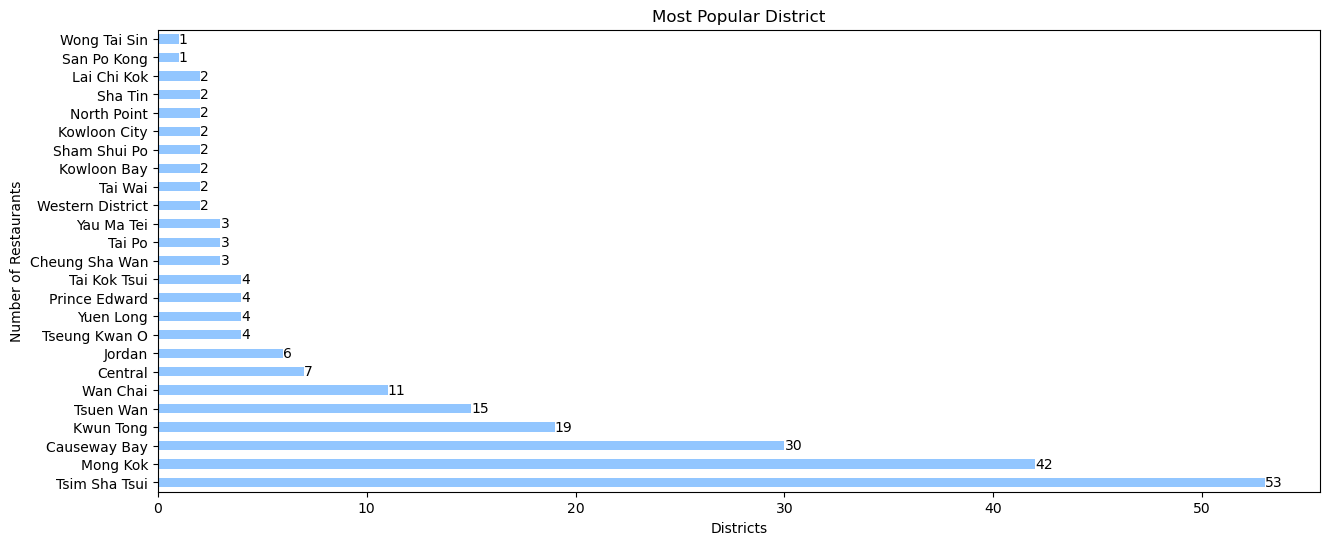

In [201]:
# Pandas bar plot
# Number of rows per district 
ax = df.district.value_counts().plot(kind='barh', figsize=(15,6))
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Most Popular District')
plt.xlabel('Districts')
plt.ylabel('Number of Restaurants')
plt.show()

## Most Popular Cuisine

In [202]:
df.cuisine.value_counts()

Western            53
Japanese           46
International      22
Korean             19
Hong Kong Style    16
Taiwan             15
Thai               11
Italian             9
Guangdong           8
Sichuan             6
French              5
Singaporean         4
American            3
Spanish             3
Indonesian          2
Yunnan              1
Australian          1
Mediterranean       1
Vietnamese          1
Name: cuisine, dtype: int64

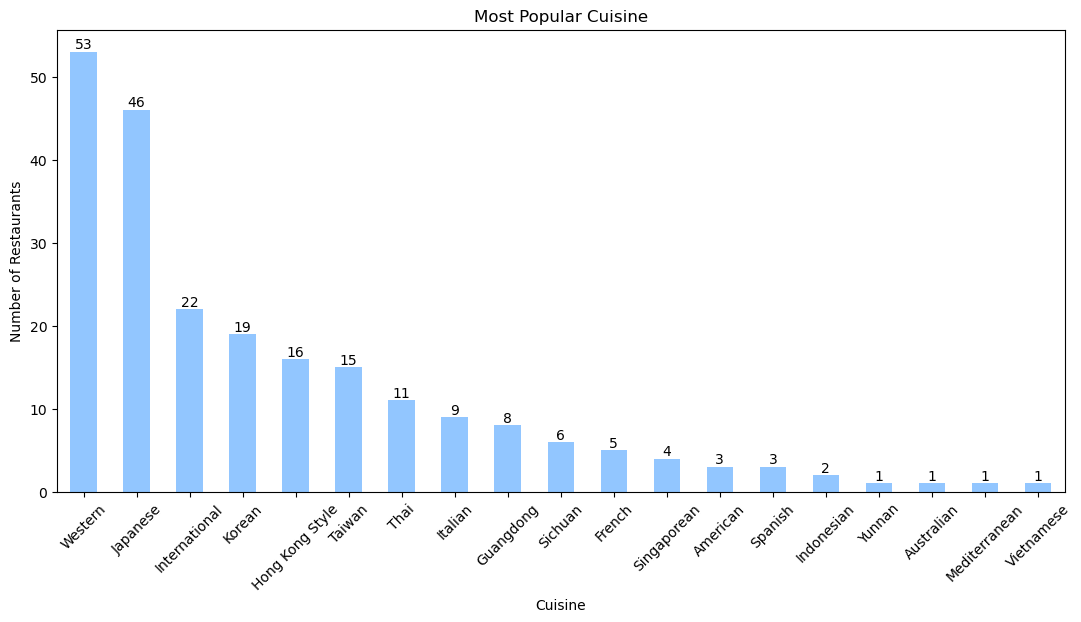

In [203]:
# Pandas bar plot
# Number of rows per district 
ax = df.cuisine.value_counts().plot(kind='bar', figsize=(13,6)) 
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Most Popular Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)#rotating the x-axis labels by 45 degrees
plt.show()

## Most Popular Dish

In [204]:
df.dish.value_counts()

Dessert                 28
Hot Pot                 23
Seafood                 20
Wine                    14
Sushi/Sashimi           11
Ramen                   11
Hamburger               10
Pizza                   10
Noodles/Rice Noodles     8
Korean Fried Chicken     7
Steak House              7
Coffee Shop              7
All Day Breakfast        5
Taiwanese Drink          5
Roast Meat               5
Skewer                   4
Western                  4
Food Wise Eateries       3
Sandwich                 3
Stir-Fry                 3
Curry                    3
Korean BBQ               3
Bar                      3
Yoshoku                  2
BBQ                      2
Private Kitchen          2
Cake                     2
Vegetarian               2
Upper-floor Cafe         2
Dim Sum                  2
Udon                     1
Seafood Restaurant       1
Teppanyaki               1
Hong Kong Style          1
Tea Restaurant           1
Salad                    1
Malaysian                1
G

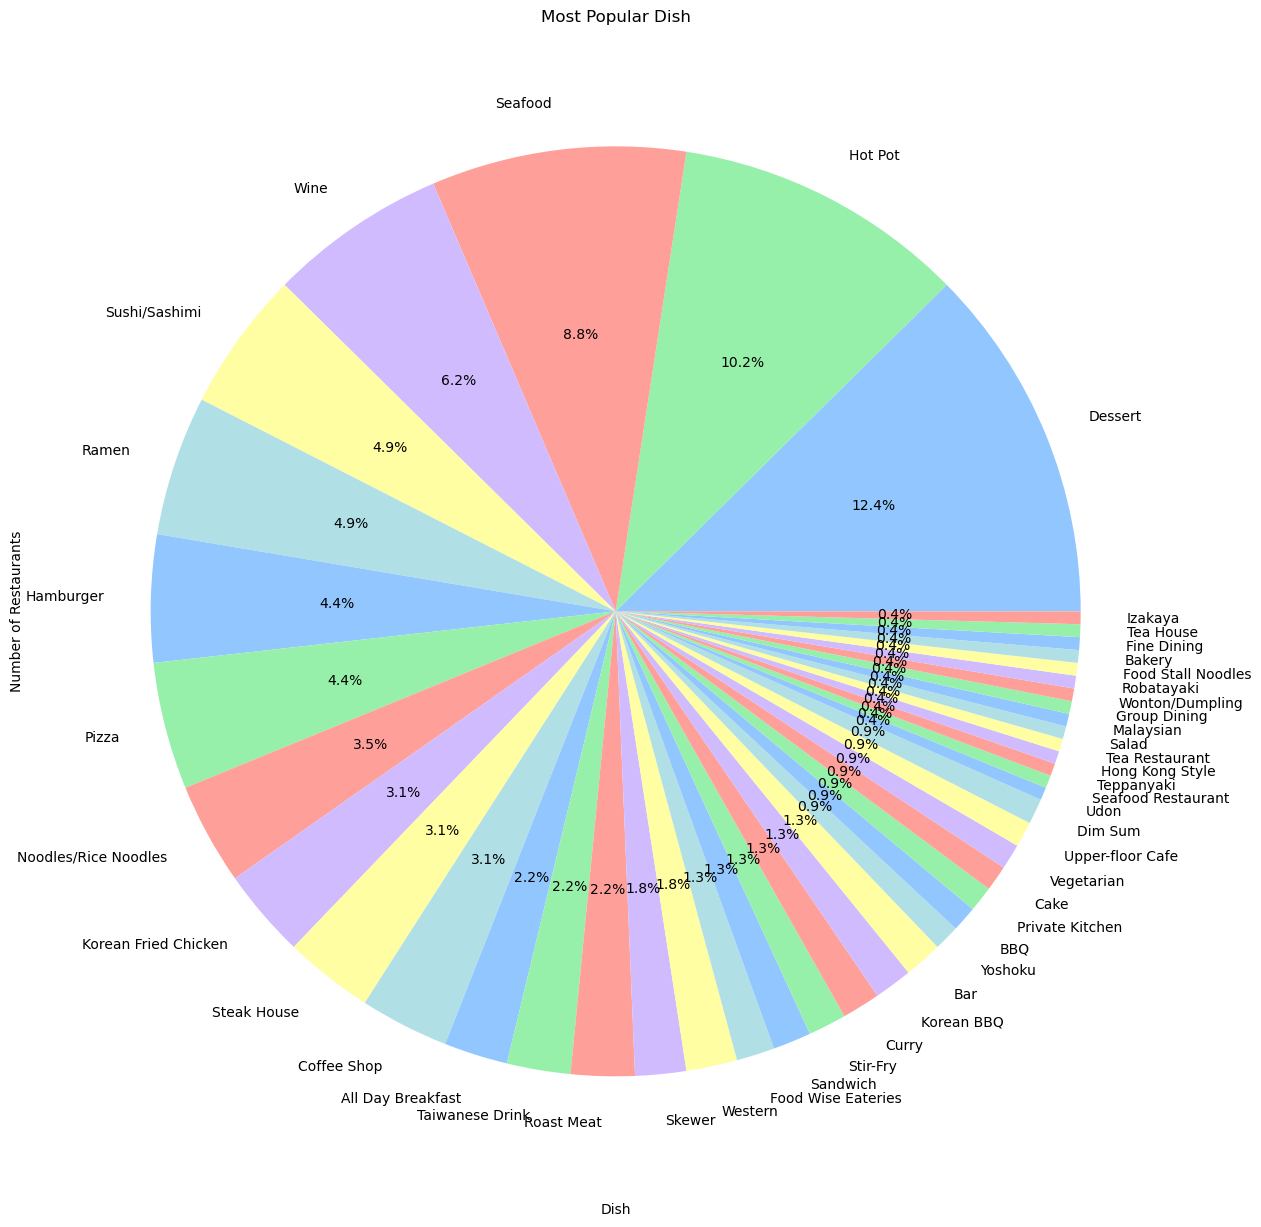

In [205]:
# Pandas bar plot
# Number of rows per district 
df.dish.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(15,30)) 
plt.title('Most Popular Dish')
plt.xlabel('Dish')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)#rotating the x-axis labels by 45 degrees
plt.show()

## Most Popular Price Per Head

In [206]:
df.price_range_per_head.value_counts()

$101-200     106
$201-400      74
$51-100       35
Below $50      6
$401-800       5
Name: price_range_per_head, dtype: int64

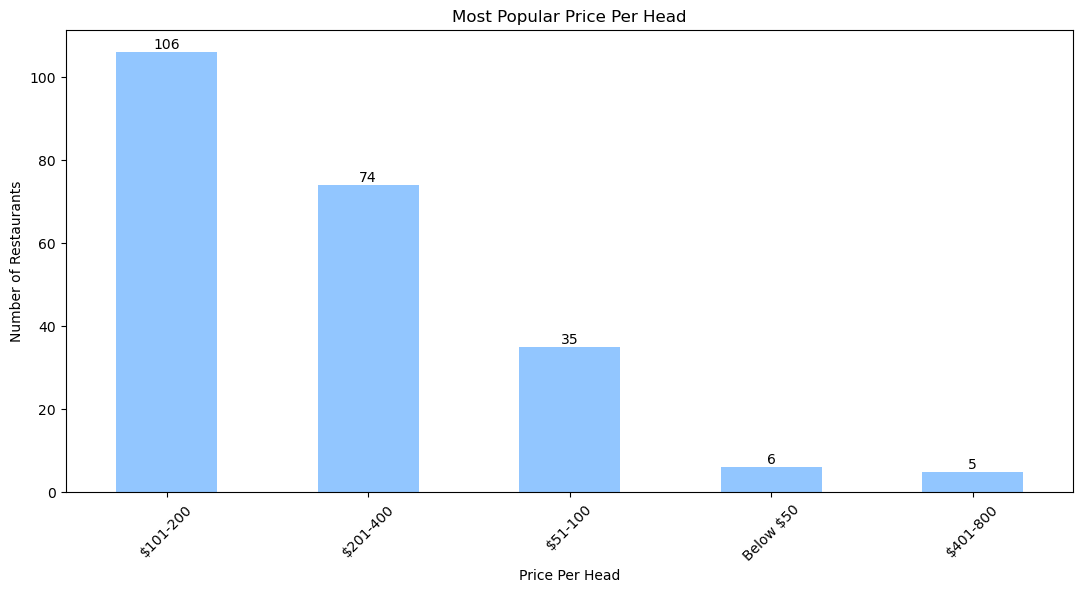

In [207]:
# Pandas bar plot
# Number of rows per district 
ax = df.price_range_per_head.value_counts().plot(kind='bar', figsize=(13,6)) 
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Most Popular Price Per Head')
plt.xlabel('Price Per Head')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)#rotating the x-axis labels by 45 degrees
plt.show()

## The relationship between price per head and overall rating

<AxesSubplot:xlabel='overall_rating_percentage_score', ylabel='Density'>

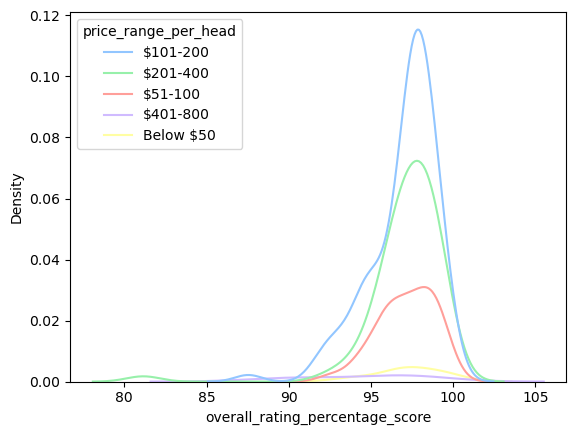

In [208]:
sns.kdeplot(data=df, x="overall_rating_percentage_score", hue="price_range_per_head") 

## Correlation between the number of ratings, reviews, bookmarks, and overall score

In [209]:
df.describe()

,good_ratings,bad_ratings,written_reviews,bookmarks,sum_of_ratings,overall_rating_percentage_score,average_price_per_head
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,651.721239,20.641593,773.884956,31040.707965,672.362832,97.005071,194.137168
std,252.782941,17.815345,305.871847,19226.195728,262.405761,2.198710,105.994900
min,242.000000,0.000000,337.000000,5000.000000,258.000000,81.155015,25.000000
25%,443.000000,9.000000,529.500000,16825.000000,460.250000,96.157051,150.000000
50%,595.500000,16.000000,701.500000,26400.000000,606.500000,97.444262,150.000000
75%,807.500000,26.000000,952.250000,38500.000000,839.500000,98.424393,300.000000
max,1386.000000,149.000000,1671.000000,117800.000000,1452.000000,100.000000,600.000000


[Text(0.5, 0, 'good_ratings'),
 Text(1.5, 0, 'bad_ratings'),
 Text(2.5, 0, 'written_reviews'),
 Text(3.5, 0, 'bookmarks'),
 Text(4.5, 0, 'sum_of_ratings'),
 Text(5.5, 0, 'overall_rating_percentage_score')]

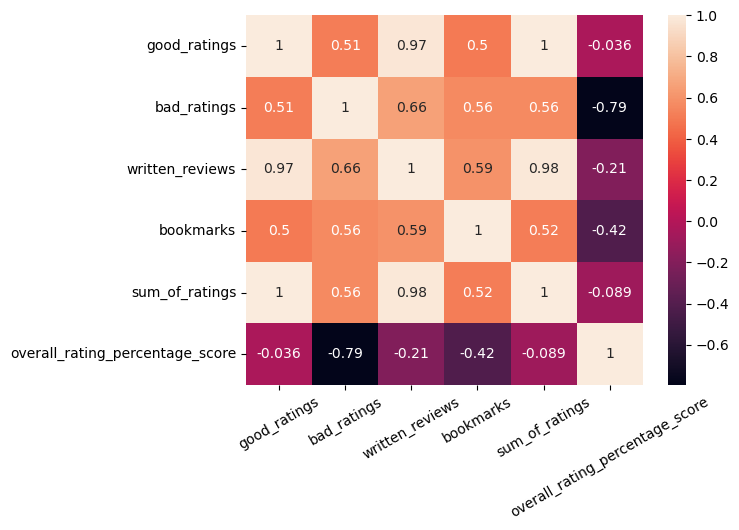

In [210]:
ax = sns.heatmap(df2.corr(), annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

C:\Users\Airin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='overall_rating_percentage_score', ylabel='Density'>

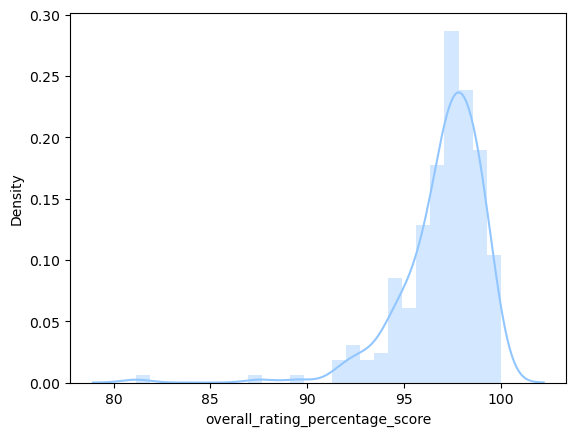

In [211]:
sns.distplot(df.overall_rating_percentage_score)

In [212]:
df.overall_rating_percentage_score.describe()

count    226.000000
mean      97.005071
std        2.198710
min       81.155015
25%       96.157051
50%       97.444262
75%       98.424393
max      100.000000
Name: overall_rating_percentage_score, dtype: float64

## PairPlot

In [214]:
df2 = df[['restaurant_name','full_address','district','cuisine','dish','price_range_per_head','good_ratings','bad_ratings','written_reviews','bookmarks','overall_rating_percentage_score', 'average_price_per_head', 'region']].copy()

In [215]:
df2

,restaurant_name,full_address,district,cuisine,dish,price_range_per_head,good_ratings,bad_ratings,written_reviews,bookmarks,overall_rating_percentage_score,average_price_per_head,region
0,Tearapy 茶聊,"1/F, 189 Portland Street, Mong Kok",Mong Kok,International,Hamburger,$101-200,1149,45,1514,72200,96.231156,150.0,Kowloon
1,The Captain's House,"18/F, H8, 8 Hau Fook Street, Tsim Sha Tsui",Tsim Sha Tsui,Western,Seafood,$201-400,1386,54,1625,65700,96.250000,300.0,Kowloon
2,Outdark (厚福街),"17/F, H8, 8 Hau Fook Street, Tsim Sha Tsui",Tsim Sha Tsui,Korean,Korean Fried Chicken,$101-200,900,22,1059,61500,97.613883,150.0,Kowloon
3,Yadllie Plate 야들리애플래이트,"11/F, CTMA Centre, 1 Sai Yeung Choi Street, Mo...",Mong Kok,Korean,Korean Fried Chicken,$101-200,1183,66,1571,117800,94.715773,150.0,Kowloon
5,Towada Sushi 十和田總本店,"G/F, Chinachem Cameron Centre, 42 Cameron Road...",Tsim Sha Tsui,Japanese,Sushi/Sashimi,$201-400,1216,40,1398,46000,96.815287,300.0,Kowloon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,DONYIN DINER 丼燃食堂,"Shop 6, G/F, Hung Wai Building, 3-5 Fa Yuen St...",Mong Kok,Japanese,Sushi/Sashimi,$51-100,367,6,418,12800,98.391421,75.0,Kowloon
245,Le Viet,"Shop L402, 4/F, The ONE, 100 Nathan Road, Tsim...",Tsim Sha Tsui,Vietnamese,Skewer,$101-200,715,28,896,30600,96.231494,150.0,Kowloon
246,Comfy by Chef's Stage (東廣場),"Shop 25-31&59, G/F, E Plaza, 7 Shing Yip Stree...",Kwun Tong,Western,Hamburger,$101-200,322,3,364,11500,99.076923,150.0,Kowloon
247,Flagship,"G/F, 35 Ship Street, Wan Chai",Wan Chai,Western,Steak House,$201-400,332,5,358,12000,98.516320,300.0,Hong Kong Island


C:\Users\Airin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


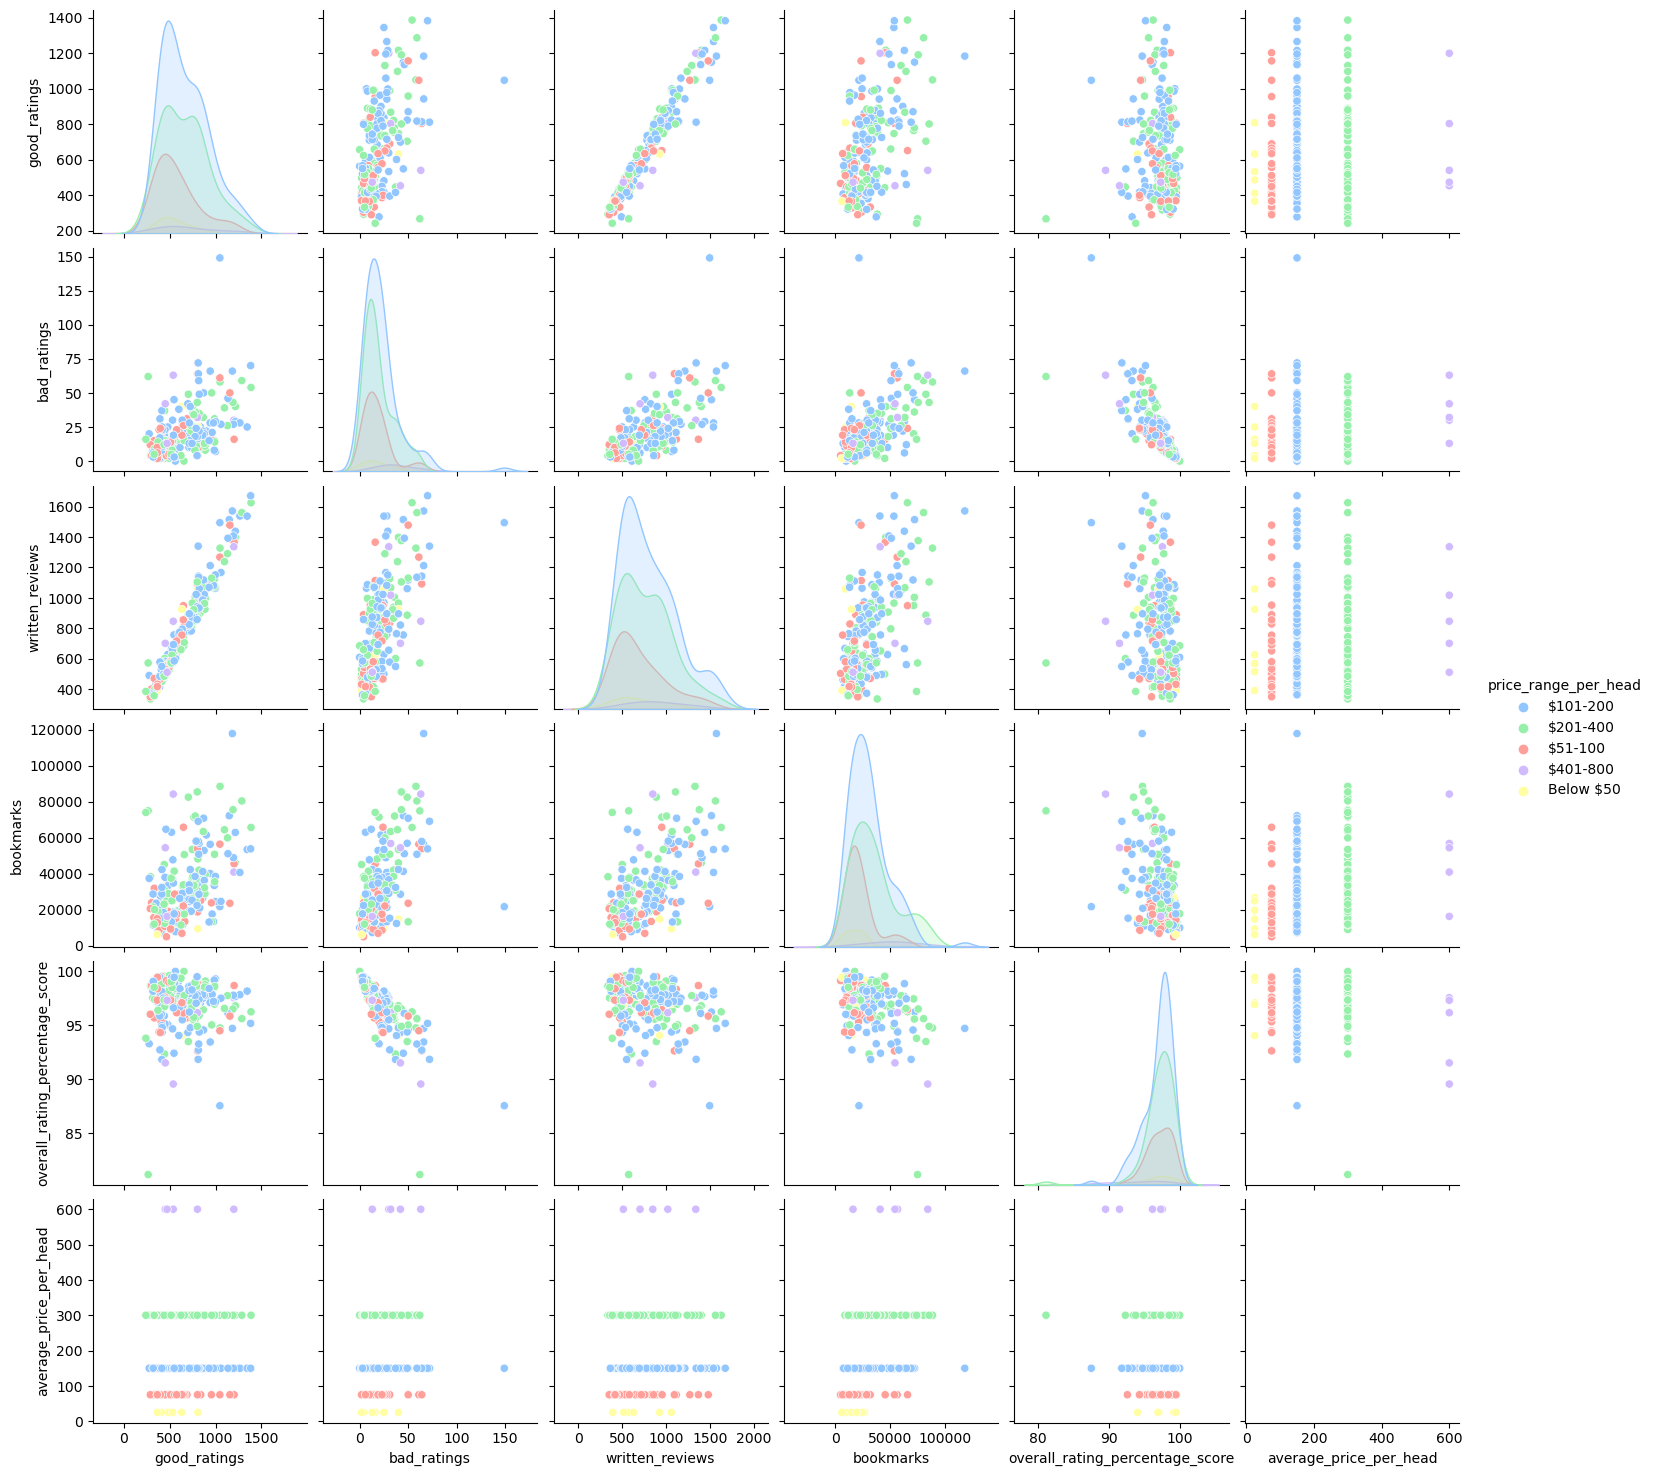

In [216]:
sns.pairplot(data=df2, hue = 'price_range_per_head', size = 2.5)

C:\Users\Airin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


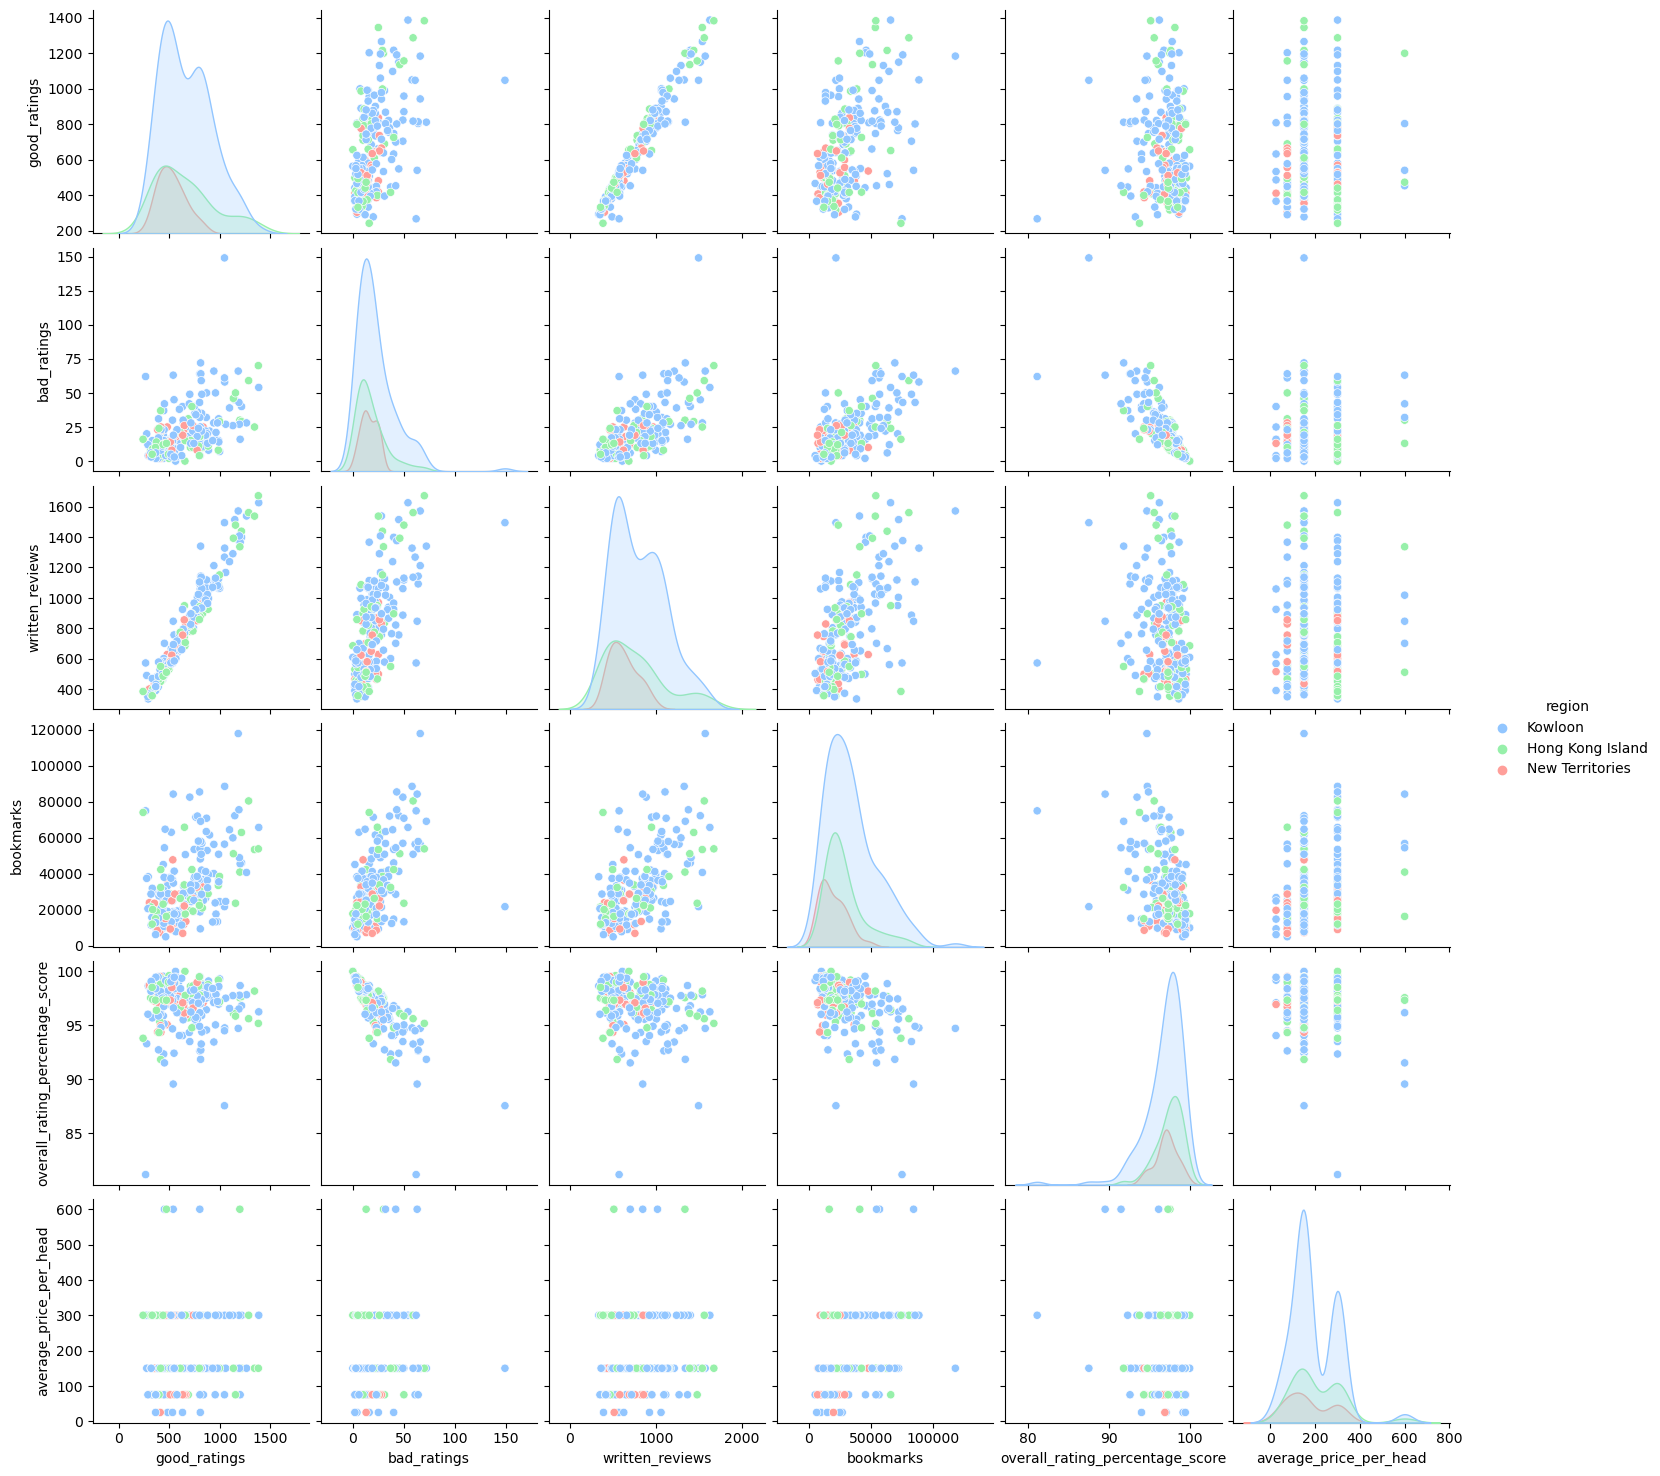

In [218]:
sns.pairplot(data=df2, hue = 'region', size = 2.5)

## Price Per Head vs Engagement Rates

<AxesSubplot:ylabel='price_range_per_head'>

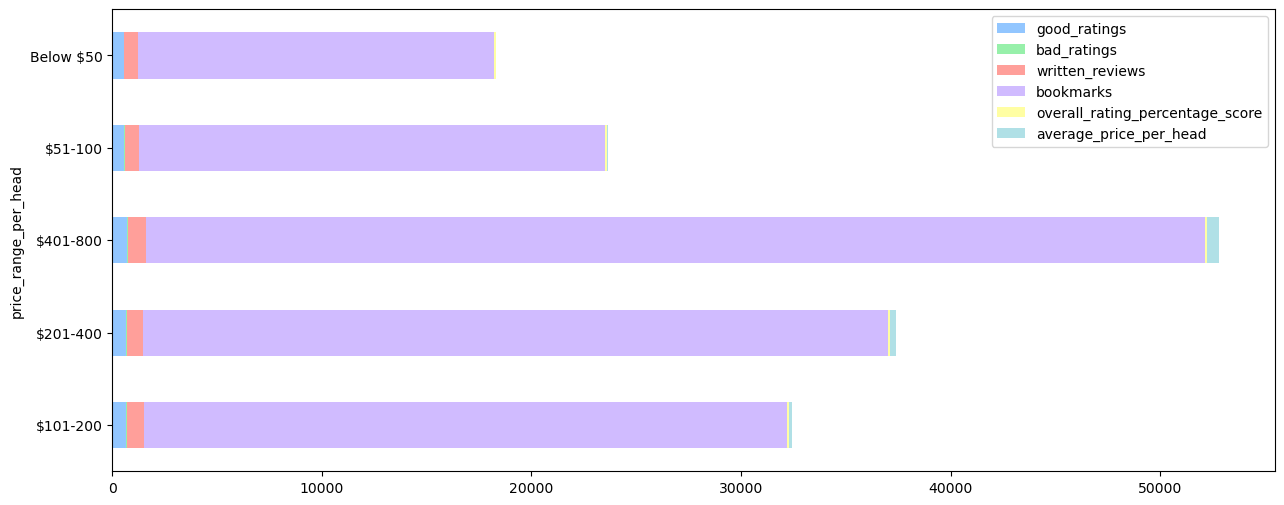

In [219]:
df2.groupby('price_range_per_head').mean().plot.barh(stacked=True, figsize=(15,6)) 

## Price Range vs  Cuisine vs Region

In [228]:
df_for_displot = df.loc[df['cuisine'].isin(['International', 'Japanese','Western'])]

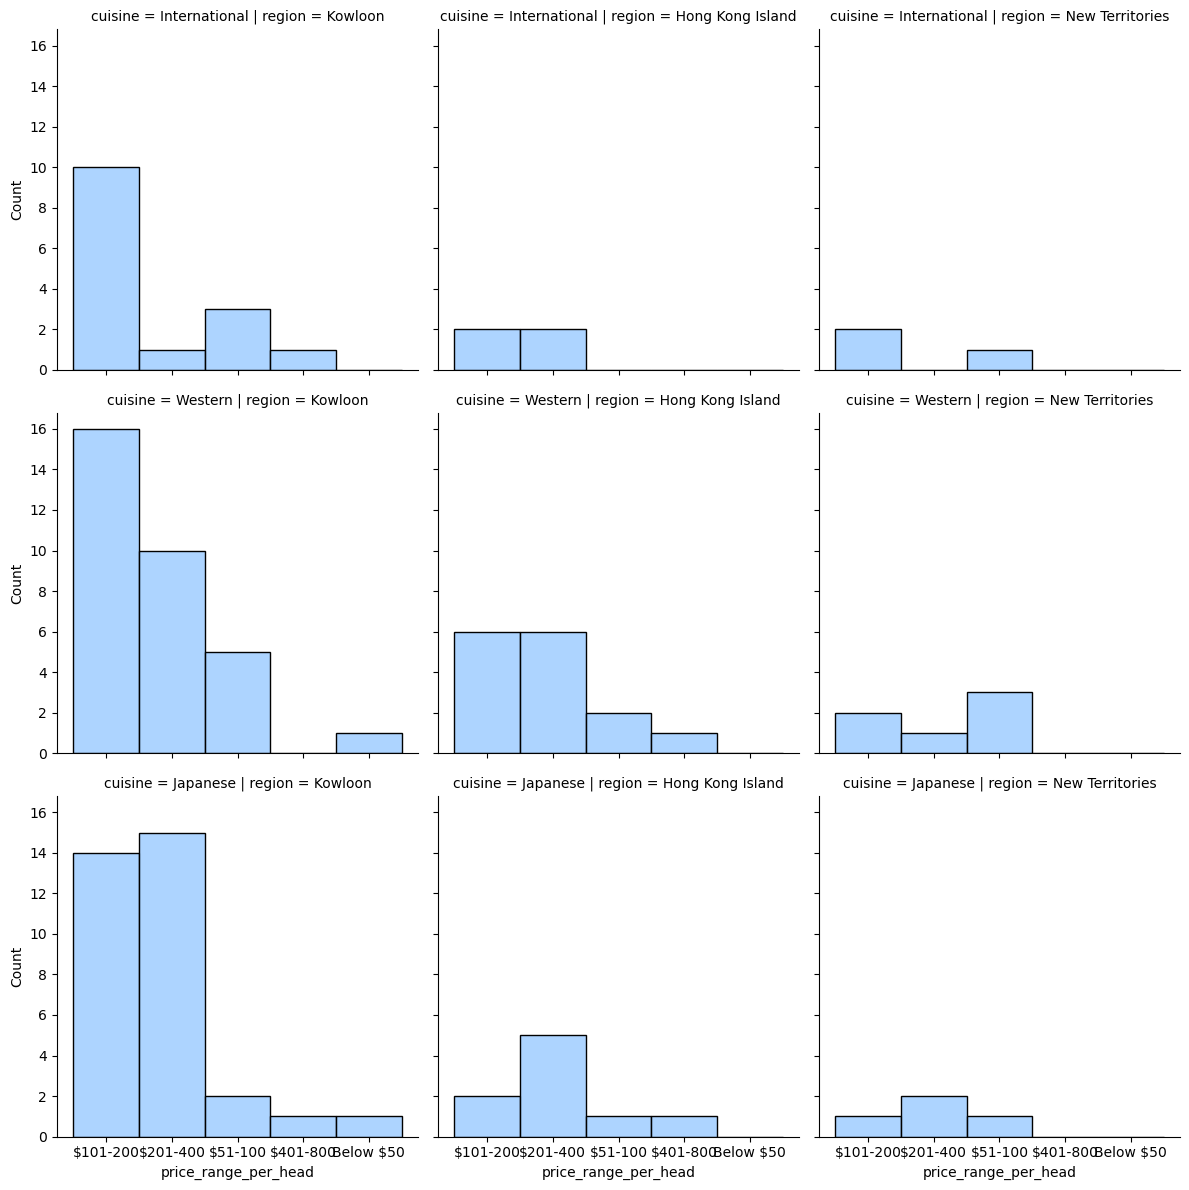

In [239]:
sns.displot(data=df_for_displot, x="price_range_per_head", col="region", row = "cuisine", kind='hist', binwidth=5, height=4, aspect = 1)

## Linear Regression - Average Price vs Overall Rating Score per Region 

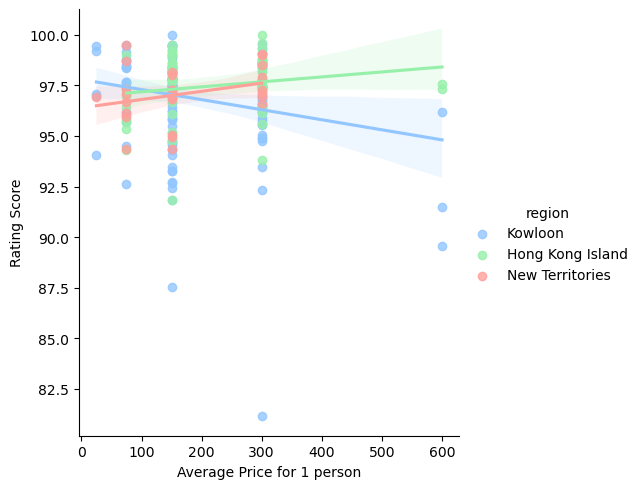

In [248]:
g = sns.lmplot(
    data=df,
    x="average_price_per_head", y="overall_rating_percentage_score", hue = "region",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Average Price for 1 person", "Rating Score")

## Linear Regression - Number of Reviews vs Overall Rating Score per Region

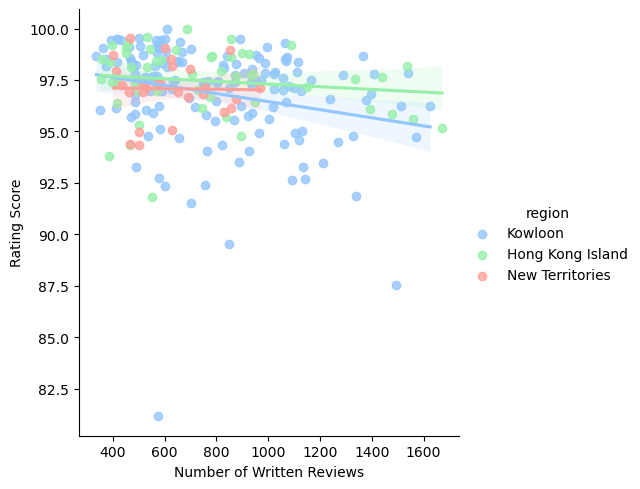

In [249]:
g = sns.lmplot(
    data=df,
    x="written_reviews", y="overall_rating_percentage_score", hue = "region",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Number of Written Reviews", "Rating Score")

## Restaurants in the 75th Percentile

In [253]:
df.describe()

,good_ratings,bad_ratings,written_reviews,bookmarks,sum_of_ratings,overall_rating_percentage_score,average_price_per_head
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,651.721239,20.641593,773.884956,31040.707965,672.362832,97.005071,194.137168
std,252.782941,17.815345,305.871847,19226.195728,262.405761,2.198710,105.994900
min,242.000000,0.000000,337.000000,5000.000000,258.000000,81.155015,25.000000
25%,443.000000,9.000000,529.500000,16825.000000,460.250000,96.157051,150.000000
50%,595.500000,16.000000,701.500000,26400.000000,606.500000,97.444262,150.000000
75%,807.500000,26.000000,952.250000,38500.000000,839.500000,98.424393,300.000000
max,1386.000000,149.000000,1671.000000,117800.000000,1452.000000,100.000000,600.000000


In [254]:
df_toprated = df.loc[df['overall_rating_percentage_score']>= 98.424393]

In [256]:
df_toprated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 12 to 247
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   restaurant_name                  57 non-null     object 
 1   price_range_per_head             57 non-null     object 
 2   good_ratings                     57 non-null     int64  
 3   bad_ratings                      57 non-null     int64  
 4   full_address                     57 non-null     object 
 5   district                         57 non-null     object 
 6   cuisine                          57 non-null     object 
 7   dish                             57 non-null     object 
 8   written_reviews                  57 non-null     int64  
 9   bookmarks                        57 non-null     int64  
 10  sum_of_ratings                   57 non-null     int64  
 11  overall_rating_percentage_score  57 non-null     float64
 12  average_price_per_head

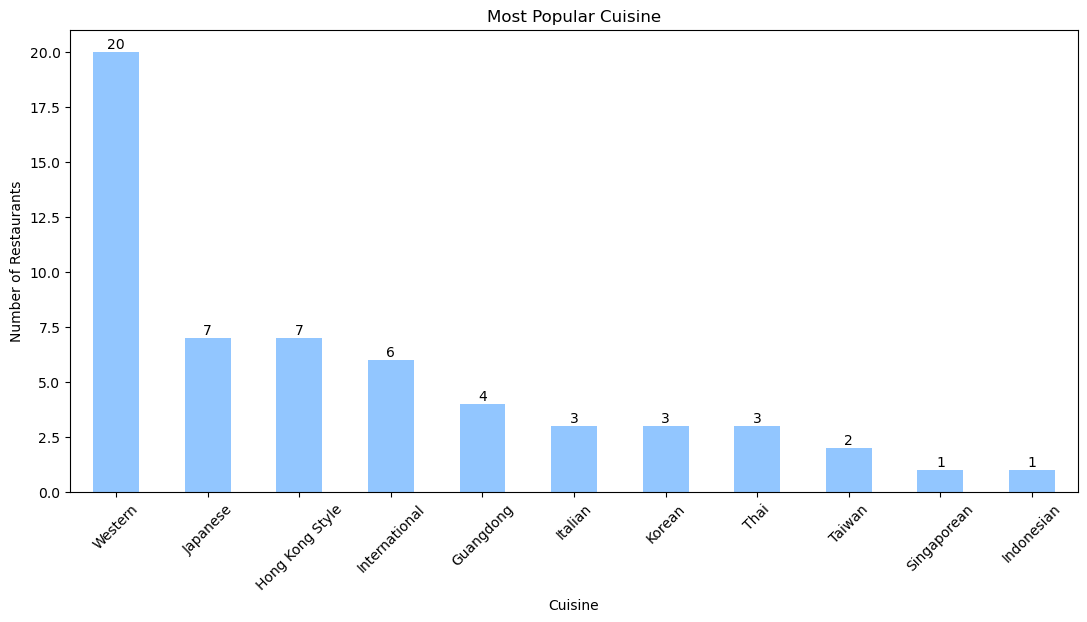

In [257]:
# Pandas bar plot
# Number of rows per district 
ax = df_toprated.cuisine.value_counts().plot(kind='bar', figsize=(13,6)) 
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Most Popular Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)#rotating the x-axis labels by 45 degrees
plt.show()

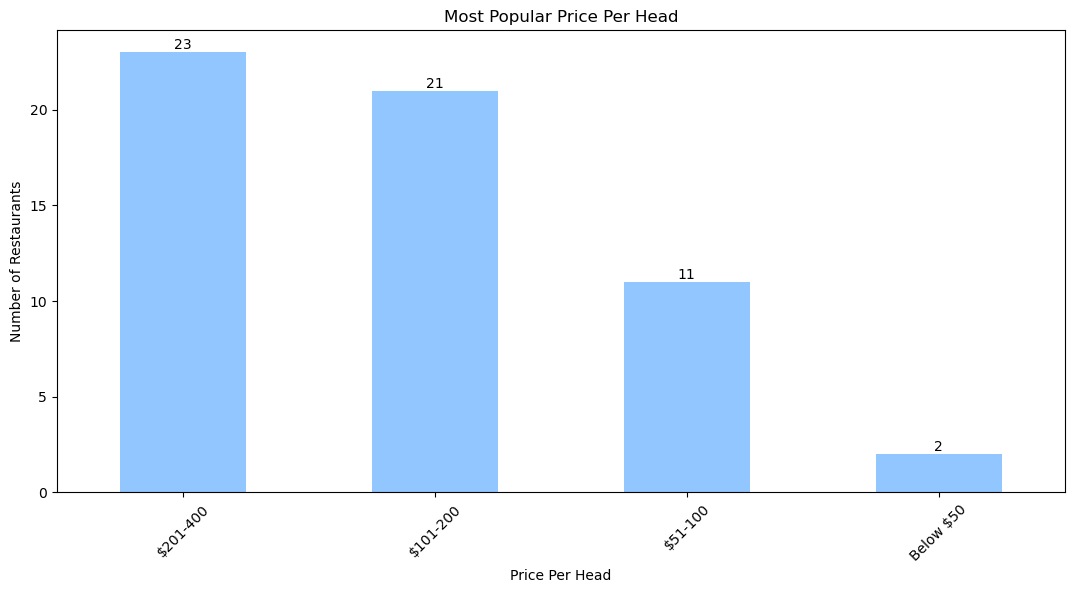

In [258]:
# Pandas bar plot
# Number of rows per district 
ax = df_toprated.price_range_per_head.value_counts().plot(kind='bar', figsize=(13,6)) 
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Most Popular Price Per Head')
plt.xlabel('Price Per Head')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)#rotating the x-axis labels by 45 degrees
plt.show()

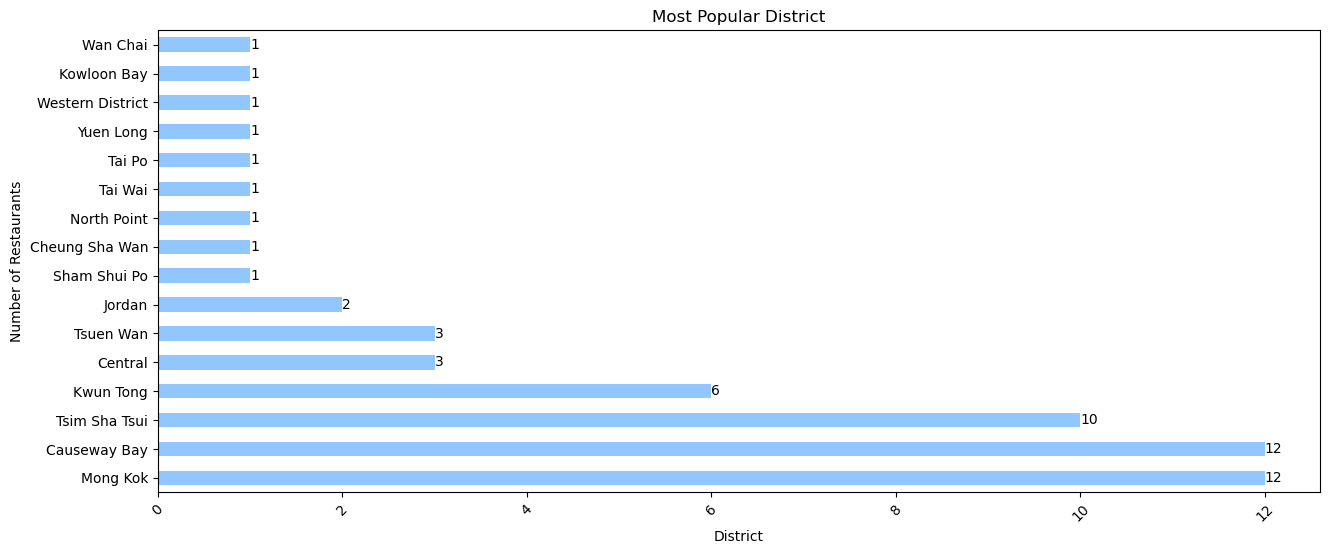

In [262]:
# Pandas bar plot
# Number of rows per district 
ax = df_toprated.district.value_counts().plot(kind='barh', figsize=(15,6)) 
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Most Popular District')
plt.xlabel('District')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)#rotating the x-axis labels by 45 degrees
plt.show()

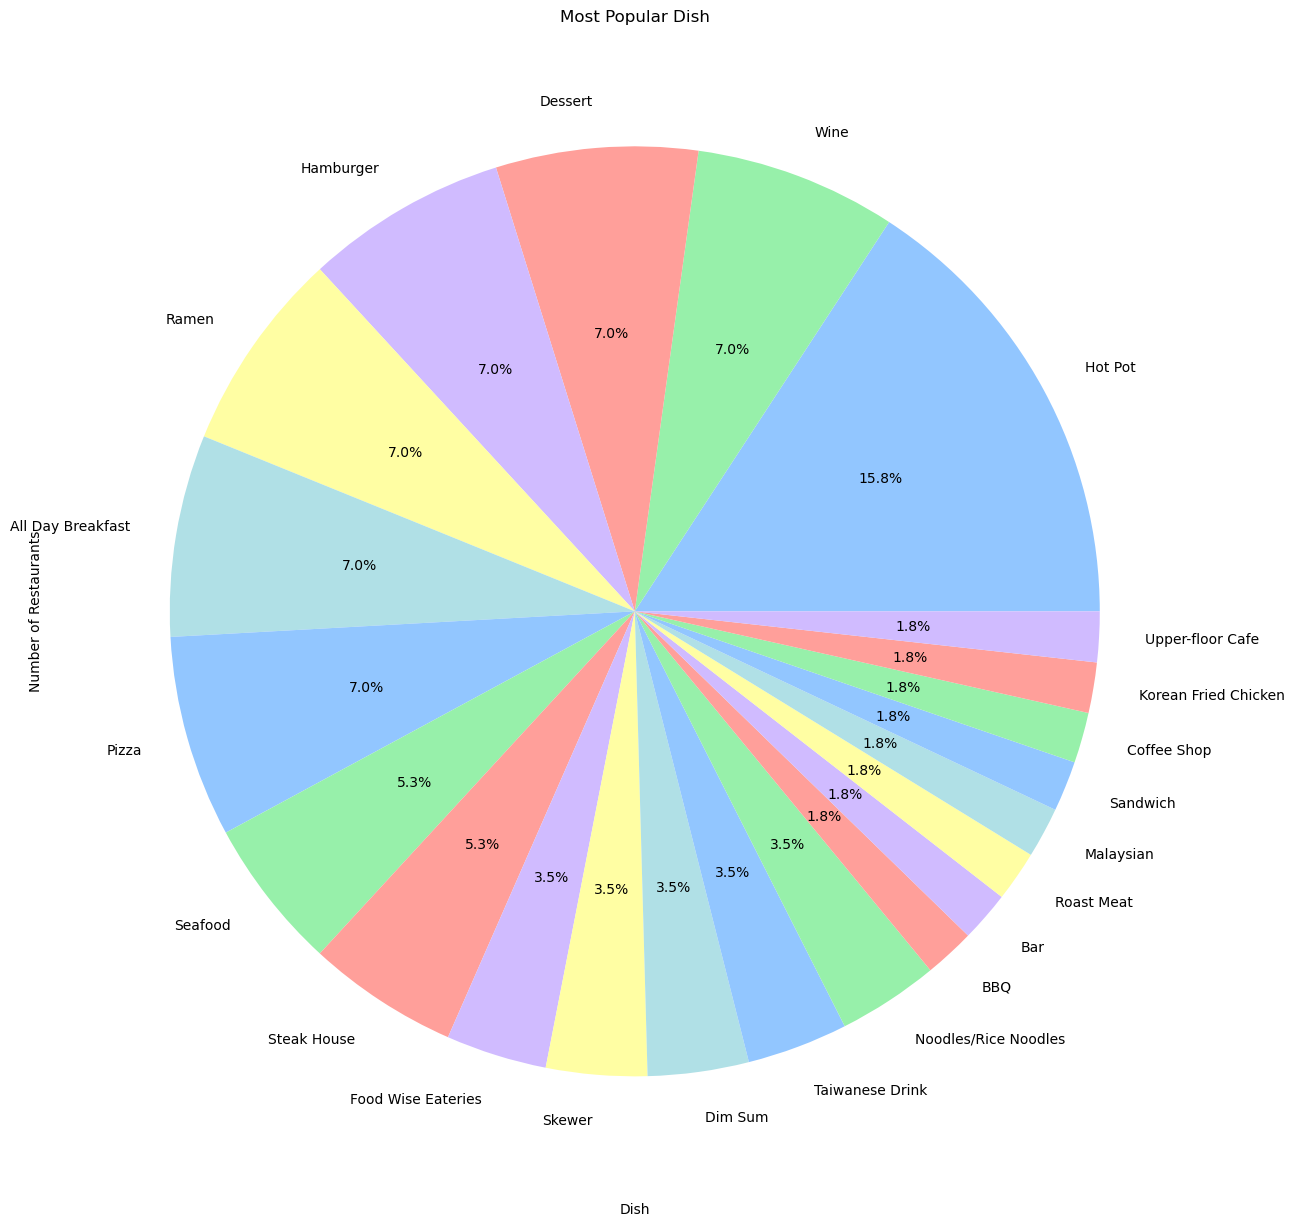

In [263]:
# Pandas bar plot
# Number of rows per district 
df_toprated.dish.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(15,30)) 
plt.title('Most Popular Dish')
plt.xlabel('Dish')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)#rotating the x-axis labels by 45 degrees
plt.show()